##  Problem Statement

### Backgroud: 
With so many unstructured data online, in the form as text, video and sounds, how can we turn them into structured data?  Nowadays we have access to thousands of reviews/comments on different social medias, while some reviews come with numeric ratings (like those on app Yelp), some don't (like those on Twitter).  Business owners can certainly trace reviews/comments from customers' posts on all sorts of popular social media platfloms, however the process could become tedious especially when the number of reviews is large and the conclusion is more towards qualitative. For those reviews/comments that don't come with numeric ratings,  if we are able to label these reviews as positive or negative (or on a scale of 1 to 5) by training models with labeled data(yelp data), we can help business owners to keep track of the feedback from customers in a faster and more interpretable way, so that they can adjust their services and offerings in response to customers' most-recent feedback.

### Problem Statement
The purpose of the project is to gain an understanding of yelp users' reviews and to predict sentimental feedback based on text from individual yelp reviews.


### Outline of the project :

#### - Problem Statement
#### - Data Properties & EDA
#### - Text Cleaning 
#### - Word Embedding
#### - Model Selections and Evaluations
#### - Results and Insights
#### - Future Work


In [1]:
# New pacakges installment
# import nltk
# nltk.download('wordnet')
# !pip install gensim
# import nltk
# nltk.download('stopwords')
# ! pip install regex
#! pip install langdetect
#! pip install langid
#! pip install pydot
#! pip install wordcloud

In [30]:
# load necessary packages
from __future__ import division, print_function
import pandas as pd
import os
import json
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
import regex
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
mpl.rcParams['figure.figsize'] = (8, 8)
#inline_rc = dict(mpl.rcParams)
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import autocorrect
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,Input, Dropout, Reshape, Activation,Flatten, concatenate, Input
from keras.layers import Bidirectional,GlobalMaxPooling1D,Conv1D, MaxPooling1D, Conv2D,MaxPool2D, MaxPooling2D
from keras.layers import Activation, Embedding, GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.models import Model
import collections
from keras.models import load_model
from nltk.classify import textcat
from langdetect import detect
import langid
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import savetxt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import History
import pydotplus
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import graphviz
from keras import regularizers
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
from sklearn.metrics import classification_report

## Data Properties and EDA

#### 1. Load data
#### 2. Basic understanding of data 
#### 3. Split data into train,test, and validation set
#### 4. WordCloud on training set

### Load Data

Specific Steps:
- loading data from yelp review and business dataset
- Filter for Charlotte city only 
- Merge review and buisness dataset
- Filter for "restaurant" category only

#### load data from yelp review and business dataset

In [2]:
# Load Yelp review dataset
reviews = []
with open('yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        #if i+1 >= 100000:
            #break
df = pd.DataFrame(reviews)
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [3]:
# Load Yelp business dataset
business = []
with open('yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        business.append(json.loads(line))
df_busi = pd.DataFrame(business)
df_busi.head()



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [4]:
df.rename(columns={'stars': 'stars_review'}, inplace=True)

In [5]:
df_busi.rename(columns={'stars': 'stars_business'}, inplace=True)

In [6]:
df.shape

(6685900, 9)

In [7]:
df_busi.shape

(192609, 14)

In [18]:
# Number of Restaurants in each city
pd.DataFrame(df_busi.city.value_counts(dropna=False)).head(10)

,city
Las Vegas,29370
Toronto,18906
Phoenix,18766
Charlotte,9509
Scottsdale,8837
Calgary,7736
Pittsburgh,7017
Montréal,6449
Mesa,6080
Henderson,4892


In [19]:
# filter for businesses in Phoenix city only
phoenix_busi_df = df_busi.loc[df_busi.city  == "Phoenix", :]

In [20]:
# filter for reviews for Phoenix city only
phoenix_busi_id = df_busi.loc[df_busi.city  == "Phoenix", "business_id"].tolist()


# Create a Dataframe containing reviews for restaurants in Phoenix only
phoenix_rev = df[df["business_id"].isin(phoenix_busi_id)]

In [21]:
# Merge business and review dataset for Phoenix city only
df_phoenix = pd.merge(phoenix_rev, phoenix_busi_df, on="business_id")

df_phoenix.to_csv("df_phoenix_reviews.csv")

In [22]:
df = pd.read_csv("df_phoenix_reviews.csv")

In [23]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,...,state,postal_code,latitude,longitude,stars_business,review_count,is_open,attributes,categories,hours
0,0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00,...,AZ,85023.0,33.626831,-112.1003,4.0,1600,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Caribbean, Szechuan, Mexican, Restaurants, Chi...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
1,1,ljyWWUY5WHa5iOweyvYsPA,Olo_x4fV1sFBtlj6COf9Wg,cHdJXLlKNWixBXpDwEGb_A,5.0,2,2,2,A must go destination in Phoenix.\nChinese - M...,2015-07-16 07:50:21,...,AZ,85023.0,33.626831,-112.1003,4.0,1600,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Caribbean, Szechuan, Mexican, Restaurants, Chi...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
2,2,cZdwD4dbYoSu0aokf3LLCA,X_LSo5sB4vVucNalQ723eg,cHdJXLlKNWixBXpDwEGb_A,4.0,0,0,0,"Second time I have been here, and the only re...",2015-07-03 21:45:17,...,AZ,85023.0,33.626831,-112.1003,4.0,1600,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Caribbean, Szechuan, Mexican, Restaurants, Chi...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,3,BfcgnuRnHkURybTMII5HVQ,cMUo-e1If4hP_GivbjQntQ,cHdJXLlKNWixBXpDwEGb_A,4.0,2,2,3,I was brought here by my coworkers. It's becom...,2008-12-03 22:42:57,...,AZ,85023.0,33.626831,-112.1003,4.0,1600,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Caribbean, Szechuan, Mexican, Restaurants, Chi...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4,4,Y7s6NijX8CBihH6NF8xEBw,nZpSxSHct3faGgonk0nmdw,cHdJXLlKNWixBXpDwEGb_A,4.0,1,0,0,Very interesting! I've tried korean/mexican fu...,2011-08-25 01:12:05,...,AZ,85023.0,33.626831,-112.1003,4.0,1600,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Caribbean, Szechuan, Mexican, Restaurants, Chi...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [24]:
df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars_review',
       'useful', 'funny', 'cool', 'text', 'date', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars_business',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [25]:
df.shape

(734136, 23)

In [27]:
# make sure there is no duplicate reviews
df.review_id.value_counts()

EBE_Ly3QO-trSOHz-2vGKw    1
cplLCkOHx9ywf6WawYBGkQ    1
Olq7haxQ7jaeacWRsr4iBg    1
V80qi5ECEjsll26lZVE6Sg    1
U8czR0S0BHaoBNSRzUbqMQ    1
                         ..
GWYjmqbdJvZcYG8sMMedCw    1
Uo7a7dOoEKuEGf_S5gcKXQ    1
bdO8LhseKbADhADTx63Klw    1
PBSfrGuJbEt_NoM1aH5NSQ    1
AsLdPFcoe_0nfyDM3xYCiA    1
Name: review_id, Length: 734136, dtype: int64

In [28]:
df.describe(include="all")

,Unnamed: 0,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,...,state,postal_code,latitude,longitude,stars_business,review_count,is_open,attributes,categories,hours
count,734136.000000,734136,734136,734136,734136.000000,734136.000000,734136.000000,734136.000000,734136,734136,...,734136,733247.000000,734136.000000,734136.000000,734136.000000,734136.000000,734136.000000,698854,733842,673848
unique,NaN,734136,253152,18766,NaN,NaN,NaN,NaN,732377,732179,...,2,NaN,NaN,NaN,NaN,NaN,NaN,8358,12168,6632
top,NaN,EBE_Ly3QO-trSOHz-2vGKw,d_TBs6J3twMy9GChqUEXkg,VyVIneSU7XAWgMBllI6LnQ,NaN,NaN,NaN,NaN,Had the worst experience with Safeway this wee...,2014-04-14 18:03:24,...,AZ,NaN,NaN,NaN,NaN,NaN,NaN,{'BusinessAcceptsCreditCards': 'True'},"Mexican, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
freq,NaN,1,721,2662,NaN,NaN,NaN,NaN,8,5,...,734105,NaN,NaN,NaN,NaN,NaN,NaN,43279,10732,37792
mean,367067.500000,NaN,NaN,NaN,3.764229,1.440333,0.501520,0.587966,NaN,NaN,...,NaN,85026.517512,33.520374,-112.050366,3.772355,310.130510,0.879559,NaN,NaN,NaN
std,211926.952948,NaN,NaN,NaN,1.505596,3.457371,1.976142,2.293659,NaN,NaN,...,NaN,151.834923,0.093962,0.055830,0.809203,437.155122,0.325477,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,36867.000000,33.256202,-112.441067,1.000000,3.000000,0.000000,NaN,NaN,NaN
25%,183533.750000,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,85013.000000,33.459004,-112.077585,3.500000,43.000000,1.000000,NaN,NaN,NaN
50%,367067.500000,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,85018.000000,33.508065,-112.057969,4.000000,145.000000,1.000000,NaN,NaN,NaN
75%,550601.250000,NaN,NaN,NaN,5.000000,2.000000,0.000000,0.000000,NaN,NaN,...,NaN,85034.000000,33.585729,-112.004239,4.500000,388.000000,1.000000,NaN,NaN,NaN


#### Filter for reviews on restaurants only

In [29]:
# Filter for only restaurants
is_restaurants = [re.search("restaurants",str(df.categories[i]).lower()) is not None for i in range(len(df))]
df = df.loc[is_restaurants,:]

In [30]:
# check shape of dataframe
df.shape

(427491, 23)

#### Distribution of target variable - "stars_reviews"

In [31]:
# looks like there is data type inconsistency
df.stars_review.value_counts()

5.0    188664
4.0    105415
3.0     48555
1.0     48075
2.0     36782
Name: stars_review, dtype: int64

In [33]:
# Check the distribution of target variable - dataset imbalanced
df.stars_review.value_counts(normalize = True)

5.0    0.441329
4.0    0.246590
3.0    0.113581
1.0    0.112459
2.0    0.086042
Name: stars_review, dtype: float64

In [34]:
labels = df.stars_review.value_counts().index.tolist()
labels

[5.0, 4.0, 3.0, 1.0, 2.0]

Text(0.5, 0, 'Star Ratings ')

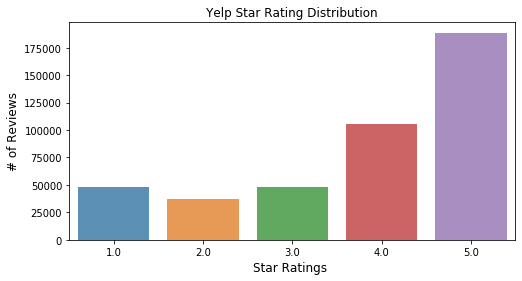

In [35]:
x=df['stars_review'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Yelp Star Rating Distribution")
plt.ylabel('# of Reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

Noted that 5-star accounts for 44.1% of the total ratings, followed by 4-star representing 24.6% of all the ratings. The distribution on 5 different stars is not balanced but I don't think the mild imbalanced would be a big issue impacting the accaracy of the model predictions.

In [36]:
# one-hot-encoding the target variables, stars_review
df = pd.concat([df,pd.get_dummies(df['stars_review'], prefix='review_stars_')],axis=1)

#### Split data set into training and test sets

In [37]:
# Create y 
y = df["stars_review"]

In [38]:
# Split into train test
train, test = train_test_split(df, test_size=0.1, random_state=42, stratify = y)

In [39]:
# Creat ytrain
ytrain = train["stars_review"]

In [40]:
# Further splitting train into train and validation set
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify = ytrain)

In [41]:
train.stars_review.value_counts(normalize = True)

5.0    0.441327
4.0    0.246589
3.0    0.113580
1.0    0.112462
2.0    0.086042
Name: stars_review, dtype: float64

In [42]:
valid.stars_review.value_counts(normalize = True)

5.0    0.441331
4.0    0.246592
3.0    0.113582
1.0    0.112451
2.0    0.086044
Name: stars_review, dtype: float64

In [43]:
test.stars_review.value_counts(normalize = True)

5.0    0.441333
4.0    0.246596
3.0    0.113591
1.0    0.112444
2.0    0.086035
Name: stars_review, dtype: float64

In [44]:
train.to_csv("yelp_train.csv")

In [45]:
test.to_csv("yelp_test.csv")

In [46]:
valid.to_csv("yelp_valid.csv")

#### Create word clouds training set data


In [2]:
# Load back datasets if needed
train= pd.read_csv("yelp_train.csv")
valid= pd.read_csv("yelp_valid.csv")
test= pd.read_csv("yelp_test.csv")

In [3]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'review_id', 'user_id', 'business_id',
       'stars_review', 'useful', 'funny', 'cool', 'text', 'date', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars_business', 'review_count', 'is_open', 'attributes', 'categories',
       'hours', 'review_stars__1.0', 'review_stars__2.0', 'review_stars__3.0',
       'review_stars__4.0', 'review_stars__5.0'],
      dtype='object')

In [48]:
train_sentence = [sen for sen in train["text"]]

In [49]:
training_all_sens = ' '.join(train_sentence)

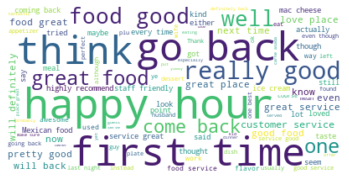

In [50]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(training_all_sens)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [51]:
wordcloud.to_file("yelp_phoenix_wordcloud.png")

In [52]:
# Try removing some sentiment-neutral words
stopwords = set(STOPWORDS)
stopwords.update(["think", "one", "restaurant", "know", "meal", "say",
                 "eat"])


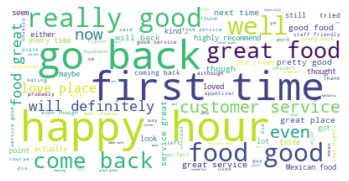

In [53]:
# Create and generate a word cloud image:
wordcloud_1 = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords,
                        background_color="white").generate(training_all_sens)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

Create separate word clouds for low-ratings and high-rating revies
    

In [54]:
negative_ind = train.loc[(train.stars_review == 1) | (train.stars_review == 2) | (train.stars_review == 3), "text"]

In [55]:
positive_ind = train.loc[(train.stars_review == 4) | (train.stars_review == 5) , "text"]

In [56]:
training_all_neg = ' '.join(negative_ind)
training_all_pos = ' '.join(positive_ind)


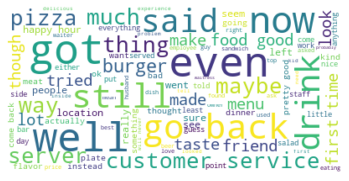

In [57]:
# Create and generate a word cloud image:
wordcloud_neg = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords,
                          background_color="white").generate(training_all_neg)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

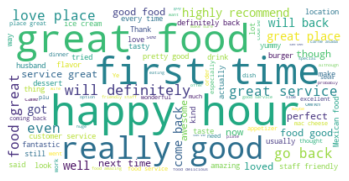

In [58]:
# Create and generate a word cloud image:
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords,
                          background_color="white").generate(training_all_pos)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

## Text Cleaning

1. Removing any leading and trailing whitespaces
2. Remove comments not in English
3. Convert to lowercase
4. Apostrophes removed
5. Splitting sentences into words
6. Remove punctuations
7. Filter out remaining tokens that are not alphabetic
8. Remove stop words
8. Word Normalization : lemmatization


*Stop words are a list of words that do not contribute to the deeper meaning of a sentence or phrase such as "a", "the", "is". Removing stop words can help us to reduce the vocabular size and therefore faster processing. While there are many stop words lists available online, it's important to consider if they are appropriate to the specific task of your project. For example, removing stop words such as "don't", "not", "aren't" would change a sentence from negative sentiment to a positive sentiment. Therefore I decided to customize a stop word list for this project. <br>
See link for more details: https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214

A short list of additional considerations when cleaning text:

- Locating and correcting common typos and misspellings.
- Word Normalization : stemming 
- Handling large documents and large collections of text documents that do not fit into memory.
- Extracting text from markup like HTML, PDF, or other structured document formats.
- Transliteration of characters from other languages into English.
- Decoding Unicode characters into a normalized form, such as UTF8.
- Handling of domain specific words, phrases, and acronyms.
- Handling or removing numbers, such as dates and amounts.

Source : https://machinelearningmastery.com/clean-text-machine-learning-python/

In [4]:
# Load back datasets if needed
train= pd.read_csv("yelp_train.csv")
valid= pd.read_csv("yelp_valid.csv")
test= pd.read_csv("yelp_test.csv")

#### 1. Removing any leading and trailing whitespaces


In [5]:
striped_sen = [sen.strip() for sen in train['text']]

#### 2.Remove non-english reviews

In [6]:

english_text_train = []
notlangs_train =[]

for i in range(len(train)):
    try:
        detected_lang = detect(striped_sen[i])
        if detected_lang == "en":
            english_text_train.append(i)
        
    except:
        notlangs_train.append(i)
        
    

In [7]:
notlangs_train

[241255]

In [8]:
train["text"][notlangs_train]

241255    !
Name: text, dtype: object

In [9]:
# get index of all rows in train
full_ind = [i for i in range(len(train))]

In [10]:
# get index of non-english reviews
english_train_set = set(english_text_train) # this reduces the lookup time from O(n) to O(1)

noteng = [ind for ind in full_ind if ind not in english_train_set]

In [11]:
# Let's look what are identified as not in Englisht - not very accurate but decent
train.loc[noteng,"text"].head(10)

370               I like it. Chimi & Margaritas.  Winner!
745                                           Unique food
4389                        meh. i've experienced better.
4860    Este lugar es mi favorito para comprar popusas...
4881    Las mejores salsas que e probado ...todo muy r...
5366    Siempre que agarro comida de aquí y le doy una...
5442    David is a dickhead he's very rude and I need ...
7782    Un día pasando de pruebas y terminamos en El C...
8434    Visite este lugar con unos amigos y el servici...
9157    La comida es muy buena el servicio excelente e...
Name: text, dtype: object

In [12]:
# Remove reviews that are not able to be identified as any languange
train.drop(index =  noteng , axis=0, inplace= True )

In [13]:
train.shape


(307472, 29)

In [71]:
train['text'][8]

"Loved this place! My boyfriend lives walking distance from here so we headed over to grab a quick bite before a party. Fast, amazingly good pizza (we got the one with prosciutto and arugula) that rivals any other pizza I've had in Phoenix and fantastic service. Everyone who works is SO nice and friendly. Like- really, really nice. You'll see! I'd love to go back for drinks/dessert too!"

#### 3.Convert to lowercase

In [14]:
#Lowercasing before negation
lower_case = [[sen.lower()] for sen in train['text']]

In [72]:
# let's see an example below
lower_case[8] 

["loved this place! my boyfriend lives walking distance from here so we headed over to grab a quick bite before a party. fast, amazingly good pizza (we got the one with prosciutto and arugula) that rivals any other pizza i've had in phoenix and fantastic service. everyone who works is so nice and friendly. like- really, really nice. you'll see! i'd love to go back for drinks/dessert too!"]

#### 4.Split words by whitespace

In [17]:
#split sentence into words
words = [sen[0].split() for sen in lower_case]

In [73]:
# Check an example here
words[8]

['loved',
 'this',
 'place!',
 'my',
 'boyfriend',
 'lives',
 'walking',
 'distance',
 'from',
 'here',
 'so',
 'we',
 'headed',
 'over',
 'to',
 'grab',
 'a',
 'quick',
 'bite',
 'before',
 'a',
 'party.',
 'fast,',
 'amazingly',
 'good',
 'pizza',
 '(we',
 'got',
 'the',
 'one',
 'with',
 'prosciutto',
 'and',
 'arugula)',
 'that',
 'rivals',
 'any',
 'other',
 'pizza',
 "i've",
 'had',
 'in',
 'phoenix',
 'and',
 'fantastic',
 'service.',
 'everyone',
 'who',
 'works',
 'is',
 'so',
 'nice',
 'and',
 'friendly.',
 'like-',
 'really,',
 'really',
 'nice.',
 "you'll",
 'see!',
 "i'd",
 'love',
 'to',
 'go',
 'back',
 'for',
 'drinks/dessert',
 'too!']

#### 5. Apostrophes  removed

In [19]:
# %load appos.py
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [20]:
def appos_remove(sen):
    return [appos[word] if word in appos else word for word in sen]

In [21]:
# Apostrophes connecting words replaced with uniform structures
appos_removed = [appos_remove(sen) for sen in words]

In [74]:
# confirm the function works: "i've" became 'I have', "you'll" became "you will"
appos_removed[8]

['loved',
 'this',
 'place!',
 'my',
 'boyfriend',
 'lives',
 'walking',
 'distance',
 'from',
 'here',
 'so',
 'we',
 'headed',
 'over',
 'to',
 'grab',
 'a',
 'quick',
 'bite',
 'before',
 'a',
 'party.',
 'fast,',
 'amazingly',
 'good',
 'pizza',
 '(we',
 'got',
 'the',
 'one',
 'with',
 'prosciutto',
 'and',
 'arugula)',
 'that',
 'rivals',
 'any',
 'other',
 'pizza',
 'I have',
 'had',
 'in',
 'phoenix',
 'and',
 'fantastic',
 'service.',
 'everyone',
 'who',
 'works',
 'is',
 'so',
 'nice',
 'and',
 'friendly.',
 'like-',
 'really,',
 'really',
 'nice.',
 'you will',
 'see!',
 'I had',
 'love',
 'to',
 'go',
 'back',
 'for',
 'drinks/dessert',
 'too!']

In [23]:
#rejoin again
rejoined_sen = [' '.join(sen) for sen in appos_removed]

In [24]:
#Lowercasing again
lower_sen = [sen.lower() for sen in rejoined_sen]

In [75]:
lower_sen[8]

'loved this place! my boyfriend lives walking distance from here so we headed over to grab a quick bite before a party. fast, amazingly good pizza (we got the one with prosciutto and arugula) that rivals any other pizza i have had in phoenix and fantastic service. everyone who works is so nice and friendly. like- really, really nice. you will see! i had love to go back for drinks/dessert too!'

#### 4.Punctuation: removing the punctuation marks from each tokens

In [27]:
# define a function to replace punctuations with white space
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', ' ', text)
    return text_nopunct

In [31]:
# replace punctuations in the text with white space
text_rem_punct = [remove_punct(sen) for sen in lower_sen]

In [76]:
# Now all punctuations are removed, e.g., forward slash in 'drinks/dessert' was removed
text_rem_punct[8]

'loved this place  my boyfriend lives walking distance from here so we headed over to grab a quick bite before a party  fast  amazingly good pizza  we got the one with prosciutto and arugula  that rivals any other pizza i have had in phoenix and fantastic service  everyone who works is so nice and friendly  like  really  really nice  you will see  i had love to go back for drinks dessert too '

#### 5. Tokenize words

In [35]:
#Tokenize text on whitespace
#token_word = [sen.split() for sen in lower_sen]

token_word = [WhitespaceTokenizer().tokenize(sen) for sen in text_rem_punct]

In [77]:
token_word[8]

['loved',
 'this',
 'place',
 'my',
 'boyfriend',
 'lives',
 'walking',
 'distance',
 'from',
 'here',
 'so',
 'we',
 'headed',
 'over',
 'to',
 'grab',
 'a',
 'quick',
 'bite',
 'before',
 'a',
 'party',
 'fast',
 'amazingly',
 'good',
 'pizza',
 'we',
 'got',
 'the',
 'one',
 'with',
 'prosciutto',
 'and',
 'arugula',
 'that',
 'rivals',
 'any',
 'other',
 'pizza',
 'i',
 'have',
 'had',
 'in',
 'phoenix',
 'and',
 'fantastic',
 'service',
 'everyone',
 'who',
 'works',
 'is',
 'so',
 'nice',
 'and',
 'friendly',
 'like',
 'really',
 'really',
 'nice',
 'you',
 'will',
 'see',
 'i',
 'had',
 'love',
 'to',
 'go',
 'back',
 'for',
 'drinks',
 'dessert',
 'too']

#### 6.Remove non-alphabetic tokens

In [44]:
# Remove non-alphabetic tokens, such as numbers 
def remove_non_alpha(sen):
    return [word for word in sen if word.isalpha()]

In [45]:
non_alpha_removed = [remove_non_alpha(sen) for sen in token_word]

In [78]:
train['text'][120]

'They have some really delicious, creative rolls! They also have a great happy hour from 2-5 and 8-close with $5 sake bombs and several rolls!'

In [80]:
# confirm the function works 
" ".join(non_alpha_removed[120])

'they have some really delicious creative rolls they also have a great happy hour from and close with sake bombs and several rolls'

#### 7. Remove stop words

Customize a stopword list 
1. first look at the most frequent words in the training set
2. obtain the stopwords list provided by NLTK package as a foundation 
3. create a stopwords list 

see helpful link: https://programminghistorian.org/en/lessons/counting-frequencies

In [81]:
# Combine all words in the train set
all_train_words = [word for tokens in non_alpha_removed for word in tokens]
train_vocab = list(set(all_train_words))

In [82]:
print("The training set has a total of "+ str(len(all_train_words)) + " words with a vocab size of " + str(len(train_vocab))
      + " unique words" )

The training set has a total of 31774640 words with a vocab size of 95357 unique words


In [46]:
# def wordListToFreqDict(wordlist, vocab):
#     wordfreq = [wordlist.count(w) for w in vocab]
#     return dict(list(zip(vocab,wordfreq)))

#train_dict = wordListToFreqDict(wordlist = all_train_words, vocab = train_vocab)
# the function above is not recommended, not efficient

In [83]:
# create a vocab dictionary to record frequence of each words
train_dict = {}
for word in all_train_words:
    try:
        train_dict[word] += 1
    except KeyError:
        train_dict[word] = 1

In [84]:
# create function to sort the vocab dictionary from most frequent to least
def sortFreqDict(freqdict):
    freqword_list = [(freqdict[key], key) for key in freqdict]
    freqword_list.sort()
    freqword_list.reverse()
    return freqword_list

In [85]:
#sort the vocab dictionary from most frequent to least
sorted_train_dict = sortFreqDict(train_dict)

In [86]:
sorted_train_dict = dict(sorted_train_dict)

In [87]:
train_len = len(non_alpha_removed)
train_len

307472

In [119]:
# find most frequent words
poplist=[]
for num,word in sorted_train_dict.items():
    if num/len(all_train_words)>0.002:
        poplist.append(word)

In [120]:
poplist

['the',
 'and',
 'i',
 'a',
 'to',
 'was',
 'is',
 'it',
 'of',
 'not',
 'for',
 'in',
 'we',
 'my',
 'this',
 'with',
 'that',
 'but',
 'have',
 'they',
 'you',
 'food',
 'had',
 'on',
 'are',
 'good',
 'were',
 'place',
 'so',
 'great',
 'at',
 'be',
 'as',
 'very',
 'there',
 'service',
 'will',
 'our',
 'here',
 'out',
 'like',
 'all',
 'just',
 'if',
 'back',
 'me',
 'their',
 'time',
 'one',
 'would',
 'do',
 'get',
 'go',
 'or',
 'from',
 's',
 'when',
 'really',
 'am',
 'up',
 'did',
 'about',
 'which',
 'been',
 'an',
 'what',
 'some',
 'ordered',
 'order']

In [90]:
# identify any words that show up in more than 80% of the reviews in training set
stop_word_cand=[]
for word in poplist:
    if sum([word in sen for sen in non_alpha_removed])/train_len >= 0.80:
        stop_word_cand.append(word)
        
stop_word_cand   

['the', 'and']

In [92]:
# Get stop words from NLTK
stoplist = stopwords.words('english')

In [118]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [121]:
# create my own stopword list
custom_stop_words = ['i','me','my','myself',
                     'we','us','our','ours','ourselves',
                     'you',"you're","you've","you'll","you'd",'your','yours','yourself',
                     'yourselves',
                     'he','him','his','himself',
                     'she',"she's",'her','hers','herself',
                     'it',"it's", 'its','itself',
                     'they', 'them', 'their', 'theirs','themselves',
                     'what','which', 'who','whom', 'this','that',  "that'll",'these','those',
                     'am', 'is','are', 'was','were','be', 'been', 'being','will','would',
                     'here','there',
                     'have','has','had', 'having',  'do','does','did','doing',
                      'a','an',"and",'the', 'or',
                      't','d','s', 'll','m','o','re','ve', 'ma',
                     'to','of','for','in','out','with','on','up', 'at','as','from','about']   



In [122]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in custom_stop_words]

In [123]:
# remove stop words
filtered_words = [removeStopWords(sen) for sen in non_alpha_removed]

In [124]:
# check if stop words removed or not
filtered_words[8]

['loved',
 'place',
 'boyfriend',
 'lives',
 'walking',
 'distance',
 'so',
 'headed',
 'over',
 'grab',
 'quick',
 'bite',
 'before',
 'party',
 'fast',
 'amazingly',
 'good',
 'pizza',
 'got',
 'one',
 'prosciutto',
 'arugula',
 'rivals',
 'any',
 'other',
 'pizza',
 'phoenix',
 'fantastic',
 'service',
 'everyone',
 'works',
 'so',
 'nice',
 'friendly',
 'like',
 'really',
 'really',
 'nice',
 'see',
 'love',
 'go',
 'back',
 'drinks',
 'dessert',
 'too']

####  Spelling Correction 

It would be nice if we can correct the spelling error in the text. However, we are skipping this step for now as the function takes too long.

reference:https://www.quora.com/Are-there-any-NLP-auto-correct-auto-complete-libraries-for-Python

In [97]:
# # create a function for auto correct spelling errors 
# def correctspelling(tokens): 
#     spell = autocorrect.Speller(lang='en')
#     return [spell(word) for word in tokens]

In [98]:
# # Check if function works
# correctspelling(['caaaar','mussage','hte'])

In [99]:
# # auto-correct spelling
# corrected_words = [correctspelling(sen) for sen in filtered_words]

In [100]:
# # check if stop words removed or not
# corrected_words[0]

#### 7.Word Normalization : stemming or lemmatization


"The goal of both stemming and lemmatization is to reduce inflected words to their word stem, base or root form—generally a written word form.
For example, raining, rains, rained could be all stemmized to "rain".

The difference between stemming and lemmatization is the way they change the words. Stemming usually directly chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma."

Comparing the text after lemmatized and snowball-stemmed, I prefer to use the text after only lemmatization since stemming actually changes some words to less interpretable, like 'happy' to 'happi'

Source : https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming


In [126]:
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [127]:
def porterstemming(tokens):
    ps = PorterStemmer() 
    return [ps.stem(word) for word in tokens]

In [128]:
def snowballstemming(tokens):
    ss = SnowballStemmer("english")
    return [ss.stem(word) for word in tokens]

In [129]:
# Check if the function works
lemmatization(["rocking", "rains","rained","boys", "ran", "generously","happy"])

['rocking', 'rain', 'rained', 'boy', 'ran', 'generously', 'happy']

In [130]:
# Check if the function works
porterstemming(["rocking", "rains","rained","boys", "ran", "generously","happy"])

['rock', 'rain', 'rain', 'boy', 'ran', 'gener', 'happi']

In [131]:
# Check if the function works
snowballstemming(["rocking", "rains","rained","boys", "ran", "generously","happy"])

['rock', 'rain', 'rain', 'boy', 'ran', 'generous', 'happi']

In [132]:
#  Apply lemmatization to text 
lemmatized_words = [lemmatization(sen) for sen in filtered_words]

In [133]:
# #  Apply stemming
# stemmed_words = [snowballstemming(sen) for sen in lemmatized_words]

# # Check reviews after lemmatized and stemmed
# stemmed_words[8]

In [134]:
# Check reviews after lemmatized
lemmatized_words[8]

['loved',
 'place',
 'boyfriend',
 'life',
 'walking',
 'distance',
 'so',
 'headed',
 'over',
 'grab',
 'quick',
 'bite',
 'before',
 'party',
 'fast',
 'amazingly',
 'good',
 'pizza',
 'got',
 'one',
 'prosciutto',
 'arugula',
 'rival',
 'any',
 'other',
 'pizza',
 'phoenix',
 'fantastic',
 'service',
 'everyone',
 'work',
 'so',
 'nice',
 'friendly',
 'like',
 'really',
 'really',
 'nice',
 'see',
 'love',
 'go',
 'back',
 'drink',
 'dessert',
 'too']

In [135]:
# Make sure the cleaned text has the same length as the train dataframe
len(lemmatized_words) == len(train)

True

In [139]:
# Add cleaned(lemmatized) Text back to df
train['text_clean'] = [' '.join(sen) for sen in lemmatized_words]

In [140]:
# add tokenized  cleaned Text back to df
train['tokens'] =lemmatized_words

In [141]:
train["text"][8]

"Loved this place! My boyfriend lives walking distance from here so we headed over to grab a quick bite before a party. Fast, amazingly good pizza (we got the one with prosciutto and arugula) that rivals any other pizza I've had in Phoenix and fantastic service. Everyone who works is SO nice and friendly. Like- really, really nice. You'll see! I'd love to go back for drinks/dessert too!"

In [142]:
train["text_clean"][8]

'loved place boyfriend life walking distance so headed over grab quick bite before party fast amazingly good pizza got one prosciutto arugula rival any other pizza phoenix fantastic service everyone work so nice friendly like really really nice see love go back drink dessert too'

### Define a function for text cleaning

In [83]:
# Give a new name to appos_dict , in order to have the next function able to run
appos_dict = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [84]:
# define a function to remove apotrophes
def appos_remove(sen):
    return [appos_dict[word] if word in appos_dict else word for word in sen]

# define a function to replace punctuations with white space
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', ' ', text)
    return text_nopunct

# def remove_punct_sen(sen):
#     return [remove_punct(word) for word in sen]

# Remove non-alphabetic tokens, such as numbers 
def remove_non_alpha(sen):
    return [word for word in sen if word.isalpha()]
    
def removeStopWords(tokens): 
    return [word for word in tokens if word not in custom_stop_words]


# 7.Word Normalization : lemmatization
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [85]:
# create my own stopword list
custom_stop_words = ['i','me','my','myself',
                     'we','us','our','ours','ourselves',
                     'you',"you're","you've","you'll","you'd",'your','yours','yourself',
                     'yourselves',
                     'he','him','his','himself',
                     'she',"she's",'her','hers','herself',
                     'it',"it's", 'its','itself',
                     'they', 'them', 'their', 'theirs','themselves',
                     'what','which', 'who','whom', 'this','that',  "that'll",'these','those',
                     'am', 'is','are', 'was','were','be', 'been', 'being','will','would',
                     'here','there',
                     'have','has','had', 'having',  'do','does','did','doing',
                      'a','an',"and",'the', 'or',
                      't','d','s', 'll','m','o','re','ve', 'ma',
                     'to','of','for','in','out','with','on','up', 'at','as','from','about']   



In [86]:
# define a function to clean data
def text_cleaning(dataset):
    
    # 1. Remove non-english reviews
    
    # first Removing any leading and trailing whitespaces
    striped_sen = [sen.strip() for sen in dataset["text"]]
    
    
    english_text = []
    notlangs =[]

    for i in range(len(dataset)):
        try:
            detected_lang = detect(striped_sen[i])
            if detected_lang == "en":
                english_text.append(i)
        
        except:
            notlangs.append(i)
        
    
    full_ind = [i for i in range(len(dataset))]
    
    english_set = set(english_text) # this reduces the lookup time from O(n) to O(1)

    not_eng = [ind for ind in full_ind if ind not in english_set]
    
    dataset.drop(index =not_eng, axis=0, inplace= True )
    
    
    # 2.Convert to lowercase
    #first Lowercasing 
    lower_case = [[sen.lower()] for sen in dataset['text']]
    
    
    
    # 3. Split words by whitespace
    #split sentence into words 
    words = [sen[0].split() for sen in lower_case]
   
    
    
    # 4. Remove Apostrophes 
    
    # Apostrophes connecting words replaced with uniform structures
    appos_removed = [appos_remove(sen) for sen in words]
    
    #rejoin again
    rejoined_sen = [' '.join(sen) for sen in appos_removed]
    
    #Lowercasing again
    lower_sen = [sen.lower() for sen in rejoined_sen]
    
    
    
    # 5.Punctuation
    # replace punctuations in the text with white space
    text_rem_punct = [remove_punct(sen) for sen in lower_sen]
    
    
    
    
    # 6.split sentence into words
    token_word = [WhitespaceTokenizer().tokenize(sen) for sen in text_rem_punct]
    
    

    # 7.Remove non-alphabetic tokens
    non_alpha_removed = [remove_non_alpha(sen) for sen in token_word]
    
    
    
    # 8. Remove stop words

    filtered_words = [removeStopWords(sen) for sen in non_alpha_removed]
    
    
   
    # 8. Apply lemmatization 
    lemmatized_words = [lemmatization(sen) for sen in filtered_words]
    

    # Add cleaned(lemmatized) Text back to df
    dataset.loc[:,'text_clean'] = [' '.join(sen) for sen in lemmatized_words]

    # add tokenized  cleaned Text back to df
    dataset.loc[:, 'tokens'] =lemmatized_words
    

    return dataset

### Clean text in the training set

In [148]:
#train= pd.read_csv("yelp_train.csv")
valid= pd.read_csv("yelp_valid.csv")
test= pd.read_csv("yelp_test.csv")

In [14]:
#train = text_cleaning(train)

In [149]:
train.loc[:,["stars_review","tokens","text_clean","text"]].head()

,stars_review,tokens,text_clean,text
0,5.0,"[used, work, right, around, corner, all, offic...",used work right around corner all office girl ...,I used to work right around the corner from he...
1,4.0,"[very, random, boxing, rink, mason, jar, mixol...",very random boxing rink mason jar mixologist t...,"Very random. Boxing Rink, Mason Jars and Mixol..."
2,5.0,"[part, job, pick, different, incentive, busine...",part job pick different incentive business ari...,Part of my job is to pick up different incenti...
3,5.0,"[great, drink, happy, hour, tasty, vegan, opti...",great drink happy hour tasty vegan option brea...,Great drinks at happy hour and tasty vegan opt...
4,1.0,"[food, substandard, started, off, right, but, ...",food substandard started off right but then we...,The food is substandard. It started off right ...


### Clean text in the validation set

In [155]:
valid= text_cleaning(valid)

In [158]:
valid.loc[:,["stars_review","tokens","text_clean","text"]].head()

,stars_review,tokens,text_clean,text
0,2.0,"[tried, sushi, roll, first, all, no, chopstick...",tried sushi roll first all no chopstick seriou...,I tried 3 of their sushi rolls....first of all...
1,5.0,"[entire, staff, amazing, still, hard, rock, so...",entire staff amazing still hard rock so probab...,Entire staff was amazing. It's still a hard ro...
2,4.0,"[came, late, lunch, other, word, brunch, broug...",came late lunch other word brunch brought fami...,Came here for a late lunch in other words brun...
3,4.0,"[look, not, gourmet, mexican, however, fast, f...",look not gourmet mexican however fast food mex...,"Look, this is not gourmet Mexican. However, fo..."
4,1.0,"[sadly, live, north, phoenix, wife, love, chin...",sadly live north phoenix wife love chinese foo...,"Sadly, we live in north Phoenix, and my wife l..."


In [157]:
valid.shape

(76857, 31)

In [159]:
valid['text'][6]

"This was our first stop in Phoenix and it was so great!\n\nThe indoor & outdoor decor is so quaint and cool--there's so much to see. The outdoor patio is super charming and even has misters.\n\nI had my first Chimichanga here and it was sooo good and sooo spicy. I chose the Shredded Beef one with Green Chili and it was just great. So much flavor in every bite, super savory.\n\nService was super friendly and the music was loud but good.\n\nI'll definitely be back next time I'm in town!"

In [160]:
valid['text_clean'][6]

'first stop phoenix so great indoor outdoor decor so quaint cool so much see outdoor patio super charming even mister first chimichanga sooo good sooo spicy chose shredded beef one green chili just great so much flavor every bite super savory service super friendly music loud but good definitely back next time town'

In [161]:
# save cleaned training dataset 
train.to_csv("yelp_train_cleaned_0325.csv")

In [162]:
# save cleaned validation dataset 
valid.to_csv("yelp_valid_cleaned_0325.csv")

In [6]:
train = pd.read_csv("yelp_train_cleaned_0325.csv")
valid = pd.read_csv("yelp_valid_cleaned_0325.csv")

In [17]:
train['text_clean'][8]

'loved place boyfriend life walking distance so headed over grab quick bite before party fast amazingly good pizza got one prosciutto arugula rival any other pizza phoenix fantastic service everyone work so nice friendly like really really nice see love go back drink dessert too'

### Data Transformation 
#### Determine Vocab size and maximum sequence length
#### Word Tokenize and Pad sequences 
#### Word Embedding 
    1. Word embedding with Word2Vec
    2. Word embedding with GloVe

#### Determine Vocabulary size and maximum sequence length
To find the most appropriate vocabulary size and maximum sequence length of each reviews for this dataset, I got inspiration from Paul Nation and Robert Waring in their paper *VOCABULARY SIZE, TEXT COVERAGE AND WORD LISTS*.
The idea is a vocabulary of about 3000 words which provides coverage of at least 95% of a text allows new language learners (the models I will use) be able to efficiently learn from context with unknown words (Paul Nation and Robert Waring).
http://www.fltr.ucl.ac.be/fltr/germ/etan/bibs/vocab/cup.html

Based on the research result above, I decided to use a vocabulary that is large enough to cover at least 98% (greater than 95%) of the entire train text and vocabulary size is no smaller than 3000.
The maximum sequence length is at least as long as 95% of all reviews in the train set.

Let's take a look at the cleaned text to see how big the vocabulary size.

In [191]:
# perform the same tokenization on the test dataset
def check_vocab(dataset):
    dataset_info = {}
    all_words = [word for tokens in dataset.tokens for word in tokens]
    vocab = sorted(list(set(all_words)))
    sentence_lengths = [len(tokens) for tokens in dataset.tokens]
    
    dataset_info["number_all_words"] = len(all_words)
    dataset_info["number_vocab"] = len(vocab)
    dataset_info["max_sentence_lengths"] = max(sentence_lengths)
    
    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
    print("Max sentence length is %s" % max(sentence_lengths))
    
    return dataset_info

In [192]:
# All words in the training set
train_info = check_vocab(train)

train_info

18096758 words total, with a vocabulary size of 87528
Max sentence length is 572


{'number_all_words': 18096758,
 'number_vocab': 87528,
 'max_sentence_lengths': 572}

In [203]:
# average sequence length of all train set reviews is 59
np.mean([len(tokens) for tokens in train.tokens])

58.8566048290576

In [197]:
# 95% of the reviews with sequence shorter than 164
np.quantile([len(tokens) for tokens in train.tokens],0.95)

164.0

In [296]:
# 98% of the reviews with sequence no longer than 225
np.quantile([len(tokens) for tokens in train.tokens],0.98)

225.0

In [ ]:
# Use 225 as max sequence length
max_sequence_len = 225 

In [195]:
all_cleaned_train_words = [word for tokens in train["tokens"] for word in tokens]
cleaned_train_vocab = sorted(list(set(all_cleaned_train_words)))


In [196]:
print("The cleaned train set has a total of "+ str(len(all_cleaned_train_words)) + 
      " words with a vocab size of " + str(len(cleaned_train_vocab))+
      " unique words." )

print("{:.2%}".format(len(cleaned_train_vocab)/len(all_cleaned_train_words)) + " of words in the train set are unique")

The cleaned train set has a total of 18096758 words with a vocab size of 87528 unique words.
0.48% of words in the train set are unique


In [267]:
# create a vocab dictionary to record frequence of each words
cleaned_train_dict = {}
for word in all_cleaned_train_words:
    try:
        cleaned_train_dict[word] += 1
    except KeyError:
        cleaned_train_dict[word] = 1

In [268]:
# create function to sort the vocab dictionary from most frequent to least
def sortFreqDict(freqdict):
    freqword_list = [(freqdict[key], key) for key in freqdict]
    freqword_list.sort()
    freqword_list.reverse()
    return freqword_list

In [269]:
#sort the vocab dictionary from most frequent to least
sorted_cleaned_train_list = sortFreqDict(cleaned_train_dict)

In [210]:
# convert list to dict
sorted_cleaned_train_dict = dict(sorted_cleaned_train_list)

In [228]:
# total number of words in the combine train set
all_train_words = len(all_cleaned_train_words)

In [304]:
# sorted_cleaned_train_dict={}
# for (num,w) in sorted_cleaned_train_list:
#     sorted_cleaned_train_dict[w] = num

# # calculate number of most frequent words that cover at least 95% of the all texts in train
# count = 0
# words_list=[]
# words_num =0 
# for num, word in sorted_cleaned_train_dict.items():
#     if count/all_train_words <= 0.99:
#         count += num
#         words_list.append(word)
#         words_num += 1  

In [399]:
count_1 = 0
words_list_1 =[]
words_num_1 =0 
for (num,word) in sorted_cleaned_train_list:
    if count_1/all_train_words <= 0.95:
        count_1 += num
        words_list_1.append(word)
        words_num_1 += 1
# seems like 4911 most frequent words is enough, we will use 5000 for vocab size
print("The first " + str(words_num_1) + " most frequent words cover at least 95% of entire train text")    

The first 4911 most frequent words cover at least 95% of entire train text


In [367]:

count = 0
words_list=[]
words_num =0 
for (num,word) in sorted_cleaned_train_list:
    if count/all_train_words <= 0.98:
        count += num
        words_list.append(word)
        words_num += 1
    

In [369]:
# the first 10000 most frequent words will can have 98% coverage over the entire train set
print("The first " + str(words_num) + " most frequent words cover at least 98% of entire train text")

The first 10534 most frequent words cover at least 98% of entire train text



Based on the information above, I will map each word onto a 300 length real valued vector (vector length determined by the pre-trained word2vec). I will also limit the total number of words that we are interested in modeling to the 10000 most frequent words in the train set, and zero out the rest. Finally, the sequence length (number of words) in each review varies, so we will constrain each review to be 225 words, truncating long reviews and pad the shorter reviews with zero values.


In [19]:
# Based on the infomation above, I decided to use v
vocab_size=10000
max_sequence_len = 225
oov_tok = '<OOV>'

### Tokenize and Pad sequences

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, lower=True, char_level=False)

In [21]:
tokenizer.fit_on_texts(train["text_clean"].tolist())

In [94]:
train_word_index= tokenizer.word_index
train_word_index

{'<OOV>': 1,
 'not': 2,
 'but': 3,
 'food': 4,
 'place': 5,
 'good': 6,
 'so': 7,
 'great': 8,
 'very': 9,
 'time': 10,
 'service': 11,
 'like': 12,
 'all': 13,
 'just': 14,
 'if': 15,
 'back': 16,
 'one': 17,
 'get': 18,
 'go': 19,
 'when': 20,
 'really': 21,
 'restaurant': 22,
 'order': 23,
 'some': 24,
 'ordered': 25,
 'no': 26,
 'love': 27,
 'also': 28,
 'chicken': 29,
 'more': 30,
 'best': 31,
 'pizza': 32,
 'only': 33,
 'got': 34,
 'can': 35,
 'by': 36,
 'menu': 37,
 'delicious': 38,
 'too': 39,
 'try': 40,
 'nice': 41,
 'because': 42,
 'well': 43,
 'drink': 44,
 'even': 45,
 'come': 46,
 'little': 47,
 'always': 48,
 'could': 49,
 'friendly': 50,
 'other': 51,
 'came': 52,
 'make': 53,
 'staff': 54,
 'amazing': 55,
 'salad': 56,
 'table': 57,
 'first': 58,
 'after': 59,
 'cheese': 60,
 'bar': 61,
 'definitely': 62,
 'sauce': 63,
 'fresh': 64,
 'lunch': 65,
 'went': 66,
 'than': 67,
 'never': 68,
 'over': 69,
 'again': 70,
 'price': 71,
 'burger': 72,
 'taco': 73,
 'much': 74,
 '

In [95]:
len_train_word_index = len(train_word_index)
len_train_word_index

87529

In [96]:
print("Found %s unique tokens."% len(train_word_index))

Found 87529 unique tokens.


In [22]:
train_sequences= tokenizer.texts_to_sequences(train["text_clean"].tolist())

In [98]:
#Need to pad our data as the sequence length (number of words) in each review varies.

train_padded = pad_sequences(train_sequences, 
                               maxlen=max_sequence_len,
                            padding="post", truncating="post")

In [99]:
train_padded.shape

(307472, 225)

In [100]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

44
225
104
225


In [380]:
# Use the tokenizer and pad_sequences to transform valid dataset 
valid_sequences = tokenizer.texts_to_sequences(valid["text_clean"].tolist())
valid_padded = pad_sequences(valid_sequences, maxlen=max_sequence_len,
                            padding="post", truncating="post")

In [381]:
valid_padded.shape

(76857, 225)

In [382]:
print(len(valid_sequences[0]))
print(len(valid_padded[0]))

print(len(valid_sequences[10]))
print(len(valid_padded[10]))

47
225
75
225


In [383]:
savetxt("train_padded.csv", train_padded, delimiter=',')
savetxt("valid_padded.csv", valid_padded, delimiter=',')

In [5]:
# load array
train_padded = loadtxt('train_padded.csv', delimiter=',')


# load array
valid_padded = loadtxt('valid_padded.csv', delimiter=',')

# print the array
train_padded.shape

# print the array
valid_padded.shape

(76857, 225)

In [116]:
reverse_word_index = dict([(value, key) for (key, value) in train_word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train.text_clean[10])

came today after saw holly <OOV> sign corner while walking brunch kombucha tap stoked flavor tap went rosemary lemon very good make honey rather than sugar can really taste honey while still <OOV> le acidic enjoyed mom got strawberry smooth said really good lot flavor good texture most all stood service guy working possibly owner long <OOV> awesome friendly guy super laid back friendly vibe even giving <OOV> when told wanting make own kombucha home seemed like just got back relaxing <OOV> vacation <OOV> something because just very calm soothing while still upbeat friendly guy service really make place stand definitely return when phoenix ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
came today after saw holly grail sign corner while walking brunch kombucha tap stoked flavor tap went rosema

### Word Embedding
#### Model 1 : Word2Vec model


https://github.com/kk7nc/Text_Classification/blob/master/README.rst#term-frequency

I am going to use the pre-trained vectors that is trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. 

In [190]:
# First load the Google's pre-trained Word2Vec model.
word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec =gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

embedding_size = word2vec.vector_size
embedding_size

300

In [385]:
#Embedding weights for the entire vocabulary of the training set
all_train_embedding_weights = np.zeros((len(train_word_index)+1, embedding_size))

# create embedding weights for the entire train vocab
for word,index in train_word_index.items():
    all_train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(embedding_size)

print(all_train_embedding_weights.shape)

# save to csv file
savetxt('all_train_embedding_weights.csv', train_embedding_weights, delimiter=',')

In [394]:
# embedding weights for the chosen vocabulary size 10000
train_embedding_weights = np.zeros((vocab_size , embedding_size))

for word,index in train_word_index.items():
    if index <= 10000:
        train_embedding_weights[index-1,:] = word2vec[word] if word in word2vec else np.random.rand(embedding_size)

In [395]:
train_embedding_weights.shape

(10000, 300)

In [397]:
# save to csv file
savetxt('train_embedding_weights.csv', train_embedding_weights, delimiter=',')

In [4]:
# load back the embedding weights
train_embedding_weights = loadtxt('train_embedding_weights.csv', delimiter=',')

train_embedding_weights.shape

(10000, 300)

In [398]:
reverse_word_index = dict([(value, key) for (key, value) in train_word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train.text_clean[10])

came today after saw holly <OOV> sign corner while walking brunch kombucha tap stoked flavor tap went rosemary lemon very good make honey rather than sugar can really taste honey while still <OOV> le acidic enjoyed mom got strawberry smooth said really good lot flavor good texture most all stood service guy working possibly owner long <OOV> awesome friendly guy super laid back friendly vibe even giving <OOV> when told wanting make own kombucha home seemed like just got back relaxing <OOV> vacation <OOV> something because just very calm soothing while still upbeat friendly guy service really make place stand definitely return when phoenix ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
came today after saw holly grail sign corner while walking brunch kombucha tap stoked flavor tap went rosema

###  Word Embedding with GloVe

train vocab size = 10000


max_sequence_len = 225

In [106]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [108]:
glove_input_file = 'glove.twitter.27B.200d.txt'
word2vec_output_file = 'glove.twitter.27B.200d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(1193514, 200)

In [110]:
glove_path='glove.twitter.27B.200d.txt.word2vec'

In [113]:
glove =gensim.models.KeyedVectors.load_word2vec_format(glove_path, binary=False)

In [115]:
embedding_size_glove = glove.vector_size
embedding_size_glove

200

In [118]:
#Embedding weights for the entire vocabulary of the training set
all_train_embedding_weights_glove = np.zeros((len(train_word_index)+1, embedding_size_glove))

# create embedding weights for the entire train vocab
for word,index in train_word_index.items():
    all_train_embedding_weights_glove[index,:] = glove[word] if word in glove else np.random.rand(embedding_size_glove)

print(all_train_embedding_weights_glove.shape)

# save to csv file
savetxt('all_train_embedding_weights_glove.csv', all_train_embedding_weights_glove, delimiter=',')

(87530, 200)


In [119]:
# embedding weights for the chosen vocabulary size 10000
train_embedding_weights_glove = np.zeros((vocab_size , embedding_size_glove))

for word,index in train_word_index.items():
    if index <= 10000:
        train_embedding_weights_glove[index-1,:] = glove[word] if word in glove else np.random.rand(embedding_size_glove)

In [120]:
train_embedding_weights_glove.shape

(10000, 200)

In [121]:
# save to csv file
savetxt('train_embedding_weights_glove.csv', train_embedding_weights_glove, delimiter=',')

In [16]:
# # load back the embedding weights
# train_embedding_weights_glove = loadtxt('train_embedding_weights_glove.csv', delimiter=',')

# train_embedding_weights_glove.shape

(10000, 200)

### Create ytrain, yvalid

In [7]:

ytrain = train[['review_stars__1.0', 'review_stars__2.0',
       'review_stars__3.0', 'review_stars__4.0', 'review_stars__5.0']]

In [8]:
yvalid = valid[['review_stars__1.0', 'review_stars__2.0',
       'review_stars__3.0', 'review_stars__4.0', 'review_stars__5.0']]

In [7]:
ytrain.head()

,review_stars__1.0,review_stars__2.0,review_stars__3.0,review_stars__4.0,review_stars__5.0
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0


In [8]:
yvalid.head()

,review_stars__1.0,review_stars__2.0,review_stars__3.0,review_stars__4.0,review_stars__5.0
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0


In [9]:
labels = train.stars_review.value_counts().index.tolist()
labels

[5.0, 4.0, 3.0, 1.0, 2.0]

In [10]:
# let's review a list of parameters we set up  , max_sequence_len =300

vocab_size=10000
max_sequence_len = 225
oov_tok = '<OOV>'
embedding_size=300
#len_train_word_index = 87529

## Modelling

First train the following 4 models on the word2Vec embedded data.
1. LSTM model
2. BiLSTM model
3. CNN model
4. CNN-BiLSTM model

I noticed that with the word2Vec embedded training data, the best model among the 4 above is BiLST. I then trained BiLSTM model with GloVe embedded data and noticed that GloVe embedding model performed lightly better than the word2Vec model in predicting the rating of reviews.

Here are two setup I implemented to prevent overfitting.
**Early Stopping** and **Checkpoints**
We use early stopping to monitor the loss on the validation dataset and use the model checkpoint to save the best models based on validation set accuracy. Also, we set patience of early stopping of 10 epoches.

#### RNN(LSTM) model (word2vec)

parameters for lstm_model : <br>
max_sequence_len =225 <br>
vocab_size  =10000 <br>
embedding_size =300 <br>


In [411]:
# Create an instance of Sequential called "model_rnn"
lstm_model = Sequential()

#add an Embedding layer
lstm_model.add(Embedding(input_dim =vocab_size,
                            output_dim = embedding_size,
                            weights=[train_embedding_weights],
                            input_length=max_sequence_len,
                            trainable=False))

# Add a LSTM layer
lstm_model.add(LSTM(units = 64,  return_sequences=True, recurrent_dropout=0.2))

# Add 2nd LSTM layer
lstm_model.add(LSTM(units = 64, recurrent_dropout=0.2))
                    
# Add a dropout layer
lstm_model.add(Dropout(rate=0.2))

lstm_model.add(Dense(32, activation="relu"))

lstm_model.add(Dropout(rate=0.2))

# Add a Dense Layer
lstm_model.add(Dense(units=5, activation = 'softmax'))
          
# Compile
lstm_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',
                  metrics = ["accuracy"])

 
   

In [412]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 225, 300)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 225, 64)           93440     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [414]:
#patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

In [ ]:
lstm_model.fit(x = train_padded, y = ytrain, batch_size = 128 , epochs = 20,
                   validation_split=0.25, verbose=1, callbacks=[es, mc])



Train on 230604 samples, validate on 76868 samples
Epoch 1/20
230604/230604 [==============================] - 2362s 10ms/step - loss: 1.3329 - accuracy: 0.4584 - val_loss: 1.0749 - val_accuracy: 0.5336

Epoch 00001: val_accuracy improved from -inf to 0.53358, saving model to best_model.h5
Epoch 2/20
230604/230604 [==============================] - 2395s 10ms/step - loss: 0.9813 - accuracy: 0.5771 - val_loss: 0.8843 - val_accuracy: 0.6160

Epoch 00002: val_accuracy improved from 0.53358 to 0.61598, saving model to best_model.h5
Epoch 3/20
230604/230604 [==============================] - 2888s 13ms/step - loss: 0.8843 - accuracy: 0.6191 - val_loss: 0.8705 - val_accuracy: 0.6254

Epoch 00003: val_accuracy improved from 0.61598 to 0.62541, saving model to best_model.h5
Epoch 4/20
230604/230604 [==============================] - 2361s 10ms/step - loss: 0.8476 - accuracy: 0.6349 - val_loss: 0.8268 - val_accuracy: 0.6387

Epoch 00004: val_accuracy improved from 0.62541 to 0.63865, saving mod

In [11]:
# load the best_model
saved_best_lstm_model = load_model('best_lstm_model.h5')

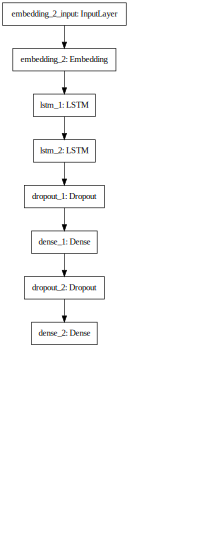

In [12]:
keras.utils.vis_utils.pydot = pyd

#Visualize Model
def visualize_model(model):
    return SVG(model_to_dot(model,dpi=45).create(prog='dot', format='svg'))

#call the function on your model
visualize_model(saved_best_lstm_model)

In [29]:
_, train_acc = saved_best_lstm_model.evaluate(train_padded, ytrain, verbose=1)
_, valid_acc = saved_best_lstm_model.evaluate(valid_padded, yvalid, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

76857/76857 [==============================] - 385s 5ms/step
Train: 0.685, Test: 0.665


In [34]:
valid_pred_lstm = saved_best_lstm_model.predict(valid_padded)

In [35]:
valid_pred_lstm_result=[]

for i in range(len(valid_pred_lstm)):
    valid_pred_lstm_result.append(np.argmax(valid_pred_lstm[i])+1)

In [36]:
print(classification_report(valid['stars_review'], valid_pred_lstm_result))

              precision    recall  f1-score   support

         1.0       0.72      0.74      0.73      8637
         2.0       0.46      0.43      0.45      6613
         3.0       0.52      0.44      0.47      8731
         4.0       0.54      0.52      0.53     18956
         5.0       0.78      0.83      0.80     33920

    accuracy                           0.67     76857
   macro avg       0.60      0.59      0.60     76857
weighted avg       0.66      0.67      0.66     76857



### BiLSTM_model (word2vec)

parameters for bilstm_model: <br>
max_sequence_len =225 <br>
embedding_size =300 <br>
vocab_size=10000 <br>

The **keras.layers.Bidirectional** wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the output. This helps the RNN to learn long range dependencies.


In [30]:
# embedding layer output_dim
embedding_size =300


In [32]:
# Create an instance of Sequential called "model_rnn"
bilstm_model = Sequential()

#add an Embedding layer
bilstm_model.add(Embedding(input_dim =vocab_size,
                            output_dim = embedding_size,
                            weights=[train_embedding_weights],
                            input_length=max_sequence_len,
                            trainable=False))

# Add a LSTM layer
bilstm_model.add(Bidirectional(LSTM(units = 256,  return_sequences=True, 
                                     recurrent_dropout=0.5)))

# Add 2nd LSTM layer
bilstm_model.add(Bidirectional(LSTM(units = 64, 
                                   dropout=0.2, recurrent_dropout=0.5)))
                    
# Add a Dense Layer
bilstm_model.add(Dense(32, activation="relu"))

# add a dropout layer
bilstm_model.add(Dropout(rate=0.5))

# Add a Dense Layer
bilstm_model.add(Dense(units=5, activation = 'softmax'))
          
# Compile
bilstm_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',
                  metrics = ["accuracy"])

 
   

In [33]:
bilstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 225, 300)          3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 225, 512)          1140736   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               295424    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 4,440,453
Trainable params: 1,440,453
Non-trainable params: 3,000,000
____________________________________

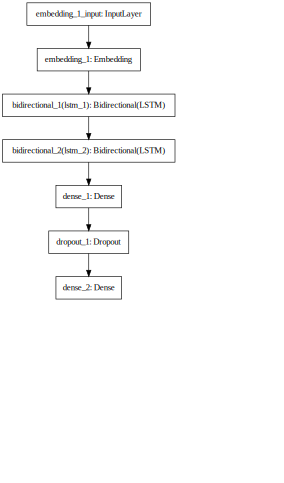

In [38]:
keras.utils.vis_utils.pydot = pyd

#Visualize Model
def visualize_model(model):
    return SVG(model_to_dot(model,dpi=45).create(prog='dot', format='svg'))

#call the function on your model
visualize_model(saved_best_bilstm_model)

In [34]:
#patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_bilstm_model.h5', monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

In [ ]:
bilstm_hist= bilstm_model.fit(x = train_padded, y = ytrain, batch_size = 128 , epochs = 20,
                   validation_split=0.25, verbose=1, callbacks=[es, mc])

Train on 230604 samples, validate on 76868 samples
Epoch 1/20
230604/230604 [==============================] - 7233s 31ms/step - loss: 1.1787 - accuracy: 0.4980 - val_loss: 0.9415 - val_accuracy: 0.5943

Epoch 00001: val_accuracy improved from -inf to 0.59434, saving model to best_bilstm_model.h5
Epoch 2/20
230604/230604 [==============================] - 7532s 33ms/step - loss: 0.9388 - accuracy: 0.5978 - val_loss: 0.8529 - val_accuracy: 0.6326

Epoch 00002: val_accuracy improved from 0.59434 to 0.63256, saving model to best_bilstm_model.h5
Epoch 3/20
230604/230604 [==============================] - 7316s 32ms/step - loss: 0.8693 - accuracy: 0.6260 - val_loss: 0.8019 - val_accuracy: 0.6522

Epoch 00003: val_accuracy improved from 0.63256 to 0.65217, saving model to best_bilstm_model.h5
Epoch 4/20
230604/230604 [==============================] - 7391s 32ms/step - loss: 0.8351 - accuracy: 0.6415 - val_loss: 0.7758 - val_accuracy: 0.6637

Epoch 00004: val_accuracy improved from 0.65217 t

In [102]:
# load the best_model
saved_best_bilstm_model = load_model('best_bilstm_model.h5')

In [14]:
_, train_acc = saved_best_bilstm_model.evaluate(train_padded, ytrain, verbose=1)
_, valid_acc = saved_best_bilstm_model.evaluate(valid_padded, yvalid, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

76857/76857 [==============================] - 1161s 15ms/step
Train: 0.683, Test: 0.668


In [ ]:
valid_pred_bilstm = saved_best_bilstm_model.predict(valid_padded)

In [27]:
valid_pred_bilstm_result=[]

for i in range(len(valid_pred_bilstm)):
    valid_pred_bilstm_result.append(np.argmax(valid_pred_bilstm[i])+1)

In [29]:
print(classification_report(valid['stars_review'], valid_pred_bilstm_result))

              precision    recall  f1-score   support

         1.0       0.73      0.76      0.75      8637
         2.0       0.49      0.30      0.38      6613
         3.0       0.50      0.45      0.47      8731
         4.0       0.54      0.53      0.54     18956
         5.0       0.77      0.85      0.81     33920

    accuracy                           0.67     76857
   macro avg       0.61      0.58      0.59     76857
weighted avg       0.65      0.67      0.66     76857



In [14]:
keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model,dpi=45).create(prog='dot', format='svg'))


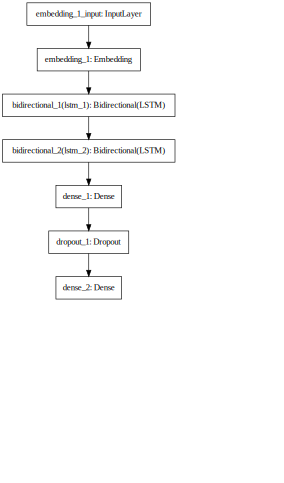

In [15]:
visualize_model(saved_best_bilstm_model)

### CNN model  (word2vec)



In [16]:
max_sequence_len

225

In [29]:
def build_model_cnn(word_index_len,embedding_dim, embedding_matrix, nclasses,
                    MAX_SEQUENCE_LENGTH,num_filters = 64,dropout_rate=0.5):
    
    
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    
    embedded_sequences = Embedding(input_dim = word_index_len,
                                output_dim =  embedding_dim,
                                weights=[embedding_matrix],
                                input_length= MAX_SEQUENCE_LENGTH,
                                trainable=False)(sequence_input)
    
    
    
    convs = []
    filter_sizes = [2,3,4,5,6]
    
    
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=num_filters ,
                        kernel_size=filter_size, 
                        activation='relu',
                        name='Conv_'+'_'+str(filter_size))(embedded_sequences)
        
        l_pool = GlobalMaxPooling1D()(l_conv)
                          
        
        convs.append(l_pool)

    l_merge = concatenate(convs, axis=1)
    
    x = Dropout(dropout_rate)(l_merge) 
    
    x = Dense(128, activation='relu')(x)
    
    x = Dropout(dropout_rate)(x)
    
    preds = Dense(nclasses, activation="softmax")(x)
    
    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()
    return model
    

   
  
    





In [30]:
cnn_model = build_model_cnn(word_index_len = vocab_size,
                                 embedding_dim= embedding_size,
                            embedding_matrix = train_embedding_weights,
                            nclasses = len(labels), 
                            MAX_SEQUENCE_LENGTH= max_sequence_len,
                            num_filters =200,
                                dropout_rate=0.5)
   

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 225)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 225, 300)     3000000     input_4[0][0]                    
__________________________________________________________________________________________________
Conv__2 (Conv1D)                (None, 224, 200)     120200      embedding_4[0][0]                
__________________________________________________________________________________________________
Conv__3 (Conv1D)                (None, 223, 200)     180200      embedding_4[0][0]                
____________________________________________________________________________________________

In [31]:
cnn_model.summary()
                                            

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 225)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 225, 300)     3000000     input_4[0][0]                    
__________________________________________________________________________________________________
Conv__2 (Conv1D)                (None, 224, 200)     120200      embedding_4[0][0]                
__________________________________________________________________________________________________
Conv__3 (Conv1D)                (None, 223, 200)     180200      embedding_4[0][0]                
____________________________________________________________________________________________

In [32]:
keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model,dpi=45).create(prog='dot', format='svg'))


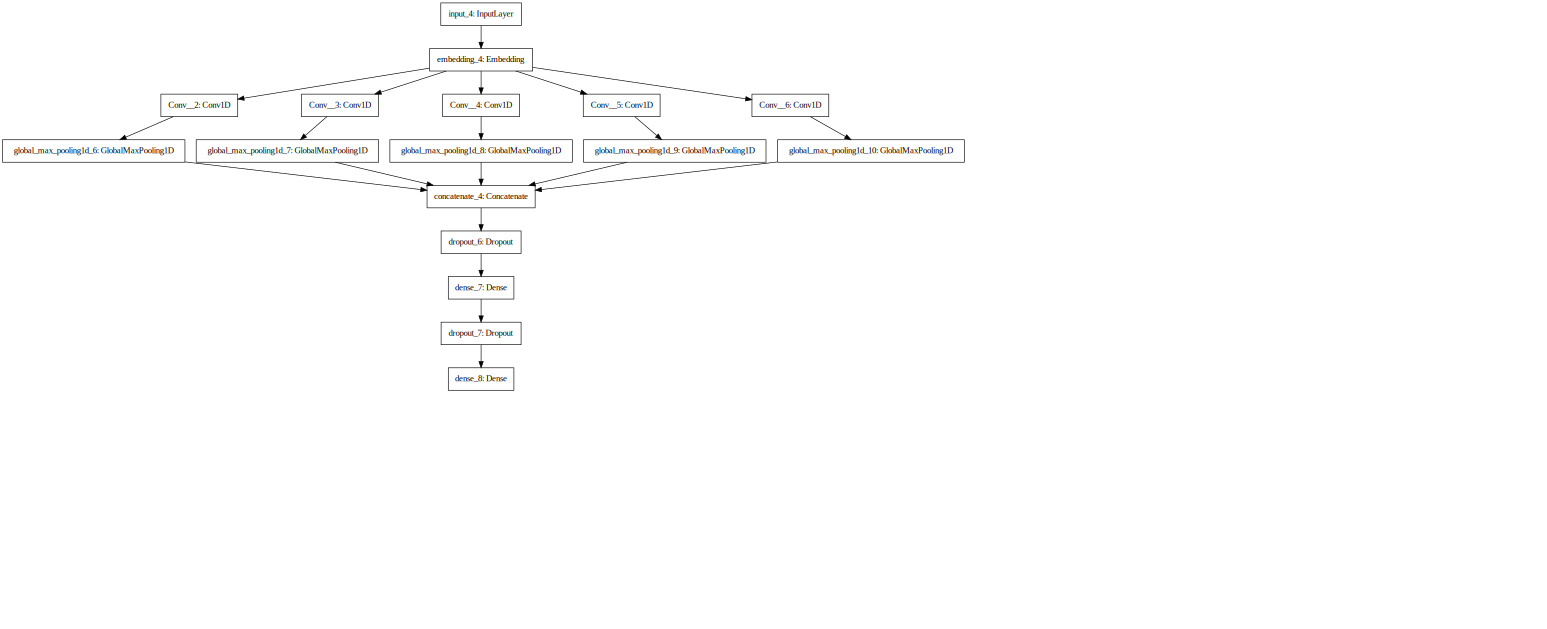

In [33]:
visualize_model(cnn_model)

In [34]:
#patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('cnn_model_best.h5', monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

In [35]:
cnn_model_hist = cnn_model.fit(x = train_padded, y = ytrain, batch_size = 128 , epochs = 20,
                   validation_split=0.2, verbose=1, callbacks=[es, mc])

Train on 245977 samples, validate on 61495 samples
Epoch 1/20
245977/245977 [==============================] - 2247s 9ms/step - loss: 1.0974 - accuracy: 0.5333 - val_loss: 0.8654 - val_accuracy: 0.6261

Epoch 00001: val_accuracy improved from -inf to 0.62615, saving model to cnn_model_best.h5
Epoch 2/20
245977/245977 [==============================] - 2327s 9ms/step - loss: 0.8914 - accuracy: 0.6172 - val_loss: 0.8352 - val_accuracy: 0.6420

Epoch 00002: val_accuracy improved from 0.62615 to 0.64197, saving model to cnn_model_best.h5
Epoch 3/20
245977/245977 [==============================] - 2250s 9ms/step - loss: 0.8421 - accuracy: 0.6375 - val_loss: 0.7991 - val_accuracy: 0.6527

Epoch 00003: val_accuracy improved from 0.64197 to 0.65265, saving model to cnn_model_best.h5
Epoch 4/20
245977/245977 [==============================] - 2299s 9ms/step - loss: 0.8109 - accuracy: 0.6494 - val_loss: 0.8128 - val_accuracy: 0.6459

Epoch 00004: val_accuracy did not improve from 0.65265
Epoch 5

In [36]:
# load the best_model
saved_best_cnn_model = load_model('cnn_model_best.h5')

In [37]:
# get the loss value & the accuracy value on the test data.
_, train_acc = saved_best_cnn_model.evaluate(train_padded, ytrain, verbose=1)
_, valid_acc = saved_best_cnn_model.evaluate(valid_padded, yvalid, verbose=1)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

76857/76857 [==============================] - 241s 3ms/step
Train: 0.722, Valid: 0.663


In [38]:
def plot_graphs(model, metric):
  plt.plot(model.history[metric])
  plt.plot(model.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
    
    

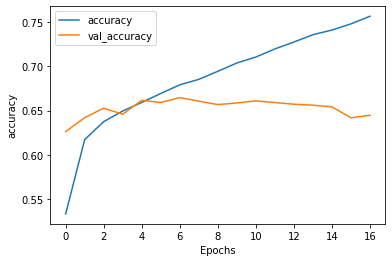

In [39]:
plot_graphs(cnn_model_hist,"accuracy" )

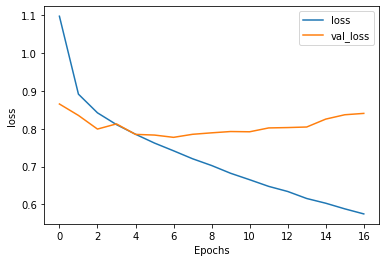

In [40]:
plot_graphs(cnn_model_hist,"loss" )

In [42]:
valid_pred_cnn = saved_best_cnn_model.predict(valid_padded)

In [43]:
valid_pred_cnn_result=[]

for i in range(len(valid_pred_cnn)):
    valid_pred_cnn_result.append(np.argmax(valid_pred_cnn[i])+1)

In [44]:
print(classification_report(valid['stars_review'], valid_pred_cnn_result))

              precision    recall  f1-score   support

         1.0       0.71      0.75      0.73      8637
         2.0       0.45      0.43      0.44      6613
         3.0       0.52      0.42      0.46      8731
         4.0       0.55      0.47      0.51     18956
         5.0       0.76      0.86      0.81     33920

    accuracy                           0.66     76857
   macro avg       0.60      0.58      0.59     76857
weighted avg       0.65      0.66      0.65     76857



### Convolutional LSTM network(word2vec) <br>
max_sequence_len =225 <br>
embedding_size =300 <br>
vocab_size =10000 <br>



In [65]:

def build_cnn_lstm_model(word_index_len, embedding_matrix, nclasses, MAX_SEQUENCE_LENGTH,
                       embedding_dim, num_filters, dropout_rate ):
    
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    
    embedded_sequences = Embedding(input_dim = word_index_len,
                                output_dim = embedding_dim,
                                weights=[embedding_matrix],
                                input_length= MAX_SEQUENCE_LENGTH,
                                trainable=False)(sequence_input)
    
    convs = []
    filter_sizes = [2,3,4,5]
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=num_filters , 
                        kernel_size=filter_size, 
                        padding='same',
                        activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=MAX_SEQUENCE_LENGTH - filter_size + 1)(l_conv)
        convs.append(l_pool)
    l_merge = concatenate(convs, axis=1)

    
    l_lstm = Bidirectional(LSTM(units = 256, 
                                      recurrent_dropout=0.5))(l_merge)
    
    
                                
    x = Dropout(dropout_rate)(l_lstm)  
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1))(x)
    x = Dropout(dropout_rate)(x)
    preds = Dense(nclasses, activation="softmax")(x)
    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()
    return model
    


In [66]:
cnn_lstm_model = build_cnn_lstm_model(word_index_len = vocab_size, 
                                      embedding_matrix = train_embedding_weights,
                                      nclasses = len(labels), 
                                     MAX_SEQUENCE_LENGTH = max_sequence_len,
                                      embedding_dim= embedding_size,
                                     num_filters =100 ,
                                     dropout_rate=0.5)
                                    
                           

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 225)          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 225, 300)     3000000     input_13[0][0]                   
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 225, 100)     60100       embedding_13[0][0]               
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 225, 100)     90100       embedding_13[0][0]               
____________________________________________________________________________________________

In [67]:
cnn_lstm_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 225)          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 225, 300)     3000000     input_13[0][0]                   
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 225, 100)     60100       embedding_13[0][0]               
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 225, 100)     90100       embedding_13[0][0]               
____________________________________________________________________________________________

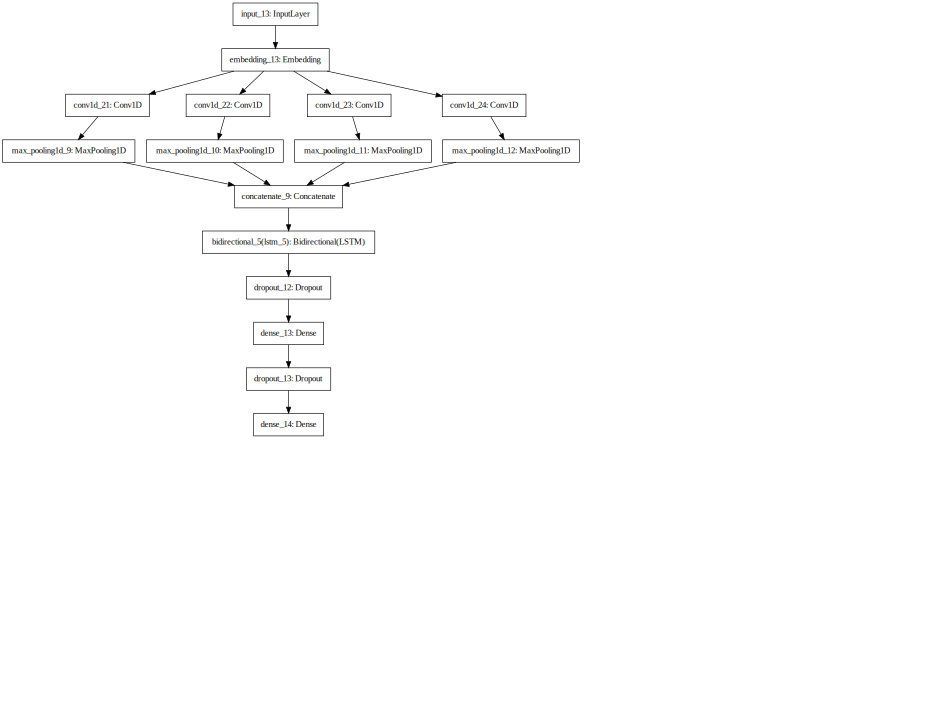

In [68]:
keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model,dpi=45).create(prog='dot', format='svg'))
#create your model
#then call the function on your model
visualize_model(cnn_lstm_model)

In [69]:
#patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('cnn_lstm_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

In [71]:
cnn_lstm_model_hist = cnn_lstm_model.fit(x = train_padded, y = ytrain, batch_size = 128 ,
                                         epochs = 15,
                   validation_split=0.2, verbose=1, callbacks=[es, mc])

Train on 245977 samples, validate on 61495 samples
Epoch 1/15
245977/245977 [==============================] - 1156s 5ms/step - loss: 4.0296 - accuracy: 0.5526 - val_loss: 0.9440 - val_accuracy: 0.6260

Epoch 00001: val_accuracy improved from -inf to 0.62600, saving model to cnn_lstm_best_model.h5
Epoch 2/15
245977/245977 [==============================] - 1121s 5ms/step - loss: 0.9321 - accuracy: 0.6391 - val_loss: 0.8958 - val_accuracy: 0.6477

Epoch 00002: val_accuracy improved from 0.62600 to 0.64771, saving model to cnn_lstm_best_model.h5
Epoch 3/15
245977/245977 [==============================] - 1076s 4ms/step - loss: 0.8688 - accuracy: 0.6683 - val_loss: 0.8957 - val_accuracy: 0.6434

Epoch 00003: val_accuracy did not improve from 0.64771
Epoch 4/15
245977/245977 [==============================] - 1117s 5ms/step - loss: 0.8159 - accuracy: 0.6944 - val_loss: 0.9128 - val_accuracy: 0.6483

Epoch 00004: val_accuracy improved from 0.64771 to 0.64835, saving model to cnn_lstm_best_m

In [72]:
# load the best_model
saved_best_cnn_lstm_model = load_model('cnn_lstm_best_model.h5')

In [73]:
_, train_acc = saved_best_cnn_lstm_model.evaluate(train_padded, ytrain, verbose=1)
_, valid_acc = saved_best_cnn_lstm_model.evaluate(valid_padded, yvalid, verbose=1)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

76857/76857 [==============================] - 151s 2ms/step
Train: 0.756, Valid: 0.646


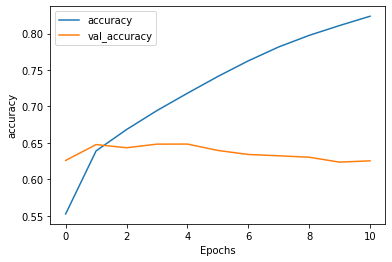

In [74]:
plot_graphs(cnn_lstm_model_hist, 'accuracy')

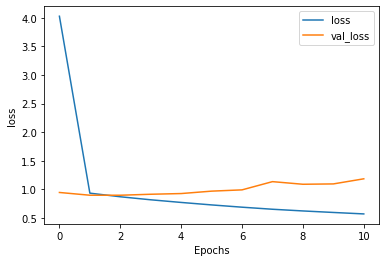

In [75]:
plot_graphs(cnn_lstm_model_hist, 'loss')

In [76]:
valid_pred_cnn_lstm = saved_best_cnn_lstm_model.predict(valid_padded)

In [77]:
valid_pred_cnn_lstm_result=[]

for i in range(len(valid_pred_cnn_lstm)):
    valid_pred_cnn_lstm_result.append(np.argmax(valid_pred_cnn_lstm[i])+1)

In [78]:
print(classification_report(valid['stars_review'], valid_pred_cnn_lstm_result))

              precision    recall  f1-score   support

         1.0       0.70      0.74      0.72      8637
         2.0       0.45      0.35      0.39      6613
         3.0       0.47      0.44      0.45      8731
         4.0       0.52      0.46      0.49     18956
         5.0       0.75      0.84      0.79     33920

    accuracy                           0.65     76857
   macro avg       0.58      0.57      0.57     76857
weighted avg       0.63      0.65      0.64     76857



### BiLSTM_model (GloVe)

parameters for bilstm_model: <br>
max_sequence_len =225 <br>
embedding_size =200 <br>
vocab_size=10000 <br>


In [122]:
# embedding layer output_dim
embedding_size_glove 


200

In [123]:
# Create an instance of Sequential called "model_rnn"
glove_bilstm_model = Sequential()

#add an Embedding layer
glove_bilstm_model.add(Embedding(input_dim =vocab_size,
                            output_dim = embedding_size_glove ,
                            weights=[train_embedding_weights_glove],
                            input_length=max_sequence_len,
                            trainable=False))

# Add a LSTM layer
glove_bilstm_model.add(Bidirectional(LSTM(units = 256,  return_sequences=True, 
                                     recurrent_dropout=0.5)))

# Add 2nd LSTM layer
glove_bilstm_model.add(Bidirectional(LSTM(units = 64, 
                                   dropout=0.2, recurrent_dropout=0.5)))

# add a dropout layer
glove_bilstm_model.add(Dropout(rate=0.5))
                    
# Add a Dense Layer
glove_bilstm_model.add(Dense(32, activation="relu"))

# add a dropout layer
glove_bilstm_model.add(Dropout(rate=0.5))

# Add a Dense Layer
glove_bilstm_model.add(Dense(units=5, activation = 'softmax'))
          
# Compile
glove_bilstm_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',
                  metrics = ["accuracy"])

 
   

In [124]:
glove_bilstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 225, 200)          2000000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 225, 512)          935936    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               295424    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                

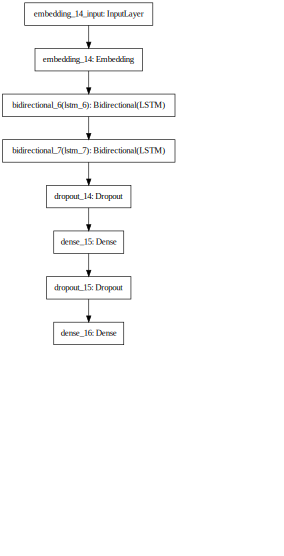

In [125]:
keras.utils.vis_utils.pydot = pyd

#Visualize Model
def visualize_model(model):
    return SVG(model_to_dot(model,dpi=45).create(prog='dot', format='svg'))

#call the function on your model
visualize_model(glove_bilstm_model)

In [14]:
#patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_glove_bilstm_model.h5', monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

In [ ]:
glove_bilstm_hist= glove_bilstm_model.fit(x = train_padded, y = ytrain, batch_size = 128 , epochs = 20,
                   validation_split=0.25, verbose=1, callbacks=[es, mc])

Train on 230604 samples, validate on 76868 samples
Epoch 1/20
230604/230604 [==============================] - 7863s 34ms/step - loss: 1.1483 - accuracy: 0.5107 - val_loss: 0.9097 - val_accuracy: 0.6028

Epoch 00001: val_accuracy improved from -inf to 0.60277, saving model to best_glove_bilstm_model.h5
Epoch 2/20
230604/230604 [==============================] - 8289s 36ms/step - loss: 0.9160 - accuracy: 0.6060 - val_loss: 0.8147 - val_accuracy: 0.6497

Epoch 00002: val_accuracy improved from 0.60277 to 0.64974, saving model to best_glove_bilstm_model.h5
Epoch 3/20
230604/230604 [==============================] - 7567s 33ms/step - loss: 0.8465 - accuracy: 0.6362 - val_loss: 0.8162 - val_accuracy: 0.6439

Epoch 00003: val_accuracy did not improve from 0.64974
Epoch 4/20
230604/230604 [==============================] - 7286s 32ms/step - loss: 0.8096 - accuracy: 0.6540 - val_loss: 0.7657 - val_accuracy: 0.6713

Epoch 00004: val_accuracy improved from 0.64974 to 0.67127, saving model to bes

The training process stopped unexpectedly during the epoch 6 (jupyter kernel shutdown). I will load the saved best model and evaluate its on train and valid dataset and then continue training it. 

In [4]:
# load the best_model
saved_best_glove_bilstm_model = load_model('best_glove_bilstm_model.h5')

In [9]:
_, train_acc = saved_best_glove_bilstm_model.evaluate(train_padded, ytrain, verbose=1)
_, valid_acc = saved_best_glove_bilstm_model.evaluate(valid_padded, yvalid, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

76857/76857 [==============================] - 1148s 15ms/step
Train: 0.693, Test: 0.675


In [10]:
valid_pred_glove_bilstm = saved_best_glove_bilstm_model.predict(valid_padded)

In [11]:
labels=[1,2,3,4,5]
valid_pred_glove_bilstm_result=[]

for p in valid_pred_glove_bilstm:
    valid_pred_glove_bilstm_result.append(labels[np.argmax(p)])

In [12]:
print(classification_report(valid['stars_review'], valid_pred_glove_bilstm_result))

              precision    recall  f1-score   support

         1.0       0.68      0.83      0.75      8637
         2.0       0.49      0.36      0.41      6613
         3.0       0.54      0.41      0.47      8731
         4.0       0.56      0.51      0.53     18956
         5.0       0.77      0.86      0.81     33920

    accuracy                           0.68     76857
   macro avg       0.61      0.59      0.60     76857
weighted avg       0.66      0.68      0.66     76857



Continue training glove_bilstm model

In [18]:
#patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_glove_bilstm_model.h5', monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

In [ ]:
glove_bilstm_hist= saved_best_glove_bilstm_model.fit(x = train_padded, y = ytrain, batch_size = 128 , epochs = 10,
                   validation_split=0.25, verbose=1, callbacks=[es, mc])

Train on 230604 samples, validate on 76868 samples
Epoch 1/10
230604/230604 [==============================] - 8370s 36ms/step - loss: 0.7634 - accuracy: 0.6729 - val_loss: 0.7378 - val_accuracy: 0.6816

Epoch 00001: val_accuracy improved from -inf to 0.68162, saving model to best_glove_bilstm_model.h5
Epoch 2/10
230604/230604 [==============================] - 8469s 37ms/step - loss: 0.7445 - accuracy: 0.6800 - val_loss: 0.7476 - val_accuracy: 0.6826

Epoch 00002: val_accuracy improved from 0.68162 to 0.68259, saving model to best_glove_bilstm_model.h5
Epoch 3/10
230604/230604 [==============================] - 8991s 39ms/step - loss: 0.7289 - accuracy: 0.6869 - val_loss: 0.7439 - val_accuracy: 0.6884

Epoch 00003: val_accuracy improved from 0.68259 to 0.68843, saving model to best_glove_bilstm_model.h5
Epoch 4/10
230604/230604 [==============================] - 8374s 36ms/step - loss: 0.7156 - accuracy: 0.6937 - val_loss: 0.7461 - val_accuracy: 0.6864

Epoch 00004: val_accuracy did n

In [3]:
# load the best_model
saved_best_glove_bilstm_model_2 = load_model('best_glove_bilstm_model.h5')

In [11]:
_, train_acc = saved_best_glove_bilstm_model_2.evaluate(train_padded, ytrain, verbose=1)
_, valid_acc = saved_best_glove_bilstm_model_2.evaluate(valid_padded, yvalid, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

76857/76857 [==============================] - 1373s 18ms/step
Train: 0.715, Test: 0.684


In [13]:
valid_pred_glove_bilstm_2 = saved_best_glove_bilstm_model_2.predict(valid_padded)

In [14]:
labels=[1,2,3,4,5]
valid_pred_glove_bilstm_result_2=[]

for p in valid_pred_glove_bilstm_2:
    valid_pred_glove_bilstm_result_2.append(labels[np.argmax(p)])

In [15]:
print(classification_report(valid['stars_review'], valid_pred_glove_bilstm_result_2))

              precision    recall  f1-score   support

         1.0       0.74      0.76      0.75      8637
         2.0       0.50      0.44      0.47      6613
         3.0       0.54      0.48      0.51      8731
         4.0       0.59      0.47      0.52     18956
         5.0       0.76      0.88      0.82     33920

    accuracy                           0.68     76857
   macro avg       0.63      0.61      0.61     76857
weighted avg       0.67      0.68      0.67     76857



### Our best model is BiLSTM 

### Apply best model to predict Test dataset

1. BiLSTM with Word2Vec embedding Model

In [79]:
test = pd.read_csv("yelp_test.csv")

In [81]:
y_test = test[['review_stars__1.0', 'review_stars__2.0',
       'review_stars__3.0', 'review_stars__4.0', 'review_stars__5.0']]

#### Clean test set

In [87]:
test = text_cleaning(test)

In [88]:
test.loc[:,["stars_review","tokens","text_clean","text"]].head()

,stars_review,tokens,text_clean,text
0,3.0,"[finding, place, large, patio, hot, summer, da...",finding place large patio hot summer day can n...,Finding a place with a large patio on a hot su...
1,4.0,"[just, business, dinner, tonight, private, roo...",just business dinner tonight private room shar...,Just had a business dinner here tonight. We we...
2,1.0,"[tried, mojo, first, time, last, night, seriou...",tried mojo first time last night seriously wor...,Tried Mojo for the first time last night and i...
3,5.0,"[celebrated, father, day, mom, ordered, grille...",celebrated father day mom ordered grilled rain...,Celebrated Fathers Day here! \nMy mom ordered ...
4,3.0,"[lox, bagel, sandwich, freaking, dollar, said,...",lox bagel sandwich freaking dollar said came d...,"$9 for a lox and bagel sandwich, $9 freaking d..."


In [89]:
test.to_csv("test_cleaned_032520.csv")

In [16]:
#test = pd.read_csv("test_cleaned_032520.csv")

#### Tokenize and pad sequence on test set

In [101]:
# Use the tokenizer and pad_sequences to transform valid dataset 
test_sequences = tokenizer.texts_to_sequences(test["text_clean"].tolist())
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_len,
                            padding="post", truncating="post")

In [28]:
savetxt("test_padded.csv", test_padded, delimiter=',')

#### Use BiLSTM-Word2Vec model on test set

In [103]:
test_pred_bilstm = saved_best_bilstm_model.predict(test_padded, batch_size=2048, 
                            verbose=1)

42698/42698 [==============================] - 350s 8ms/step


In [104]:
labels = [1,2,3,4,5]
test_pred_bilstm_result=[]

for p in test_pred_bilstm:
    test_pred_bilstm_result.append(labels[np.argmax(p)])

In [105]:
print(classification_report(test['stars_review'], test_pred_bilstm_result))

              precision    recall  f1-score   support

         1.0       0.74      0.76      0.75      4800
         2.0       0.51      0.32      0.39      3676
         3.0       0.49      0.43      0.46      4852
         4.0       0.54      0.53      0.54     10529
         5.0       0.77      0.85      0.81     18841

    accuracy                           0.67     42698
   macro avg       0.61      0.58      0.59     42698
weighted avg       0.66      0.67      0.66     42698



In [17]:
test.loc[:,["stars_review","tokens","text_clean","text"]].head()

,stars_review,tokens,text_clean,text
0,3.0,"['finding', 'place', 'large', 'patio', 'hot', ...",finding place large patio hot summer day can n...,Finding a place with a large patio on a hot su...
1,4.0,"['just', 'business', 'dinner', 'tonight', 'pri...",just business dinner tonight private room shar...,Just had a business dinner here tonight. We we...
2,1.0,"['tried', 'mojo', 'first', 'time', 'last', 'ni...",tried mojo first time last night seriously wor...,Tried Mojo for the first time last night and i...
3,5.0,"['celebrated', 'father', 'day', 'mom', 'ordere...",celebrated father day mom ordered grilled rain...,Celebrated Fathers Day here! \nMy mom ordered ...
4,3.0,"['lox', 'bagel', 'sandwich', 'freaking', 'doll...",lox bagel sandwich freaking dollar said came d...,"$9 for a lox and bagel sandwich, $9 freaking d..."


2. BiLSTM with GloVe embedding

In [23]:
# Use the tokenizer and pad_sequences to transform valid dataset 
test_sequences = tokenizer.texts_to_sequences(test["text_clean"].tolist())
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_len,
                            padding="post", truncating="post")

In [25]:
test_pred_glove_bilstm = saved_best_glove_bilstm_model_2.predict(test_padded, batch_size=2048,  
                            verbose=1)
 

42698/42698 [==============================] - 333s 8ms/step


In [26]:
labels = [1,2,3,4,5]
test_pred_glove_bilstm_result=[]

for p in test_pred_glove_bilstm:
    test_pred_glove_bilstm_result.append(labels[np.argmax(p)])

In [27]:
print(classification_report(test['stars_review'], test_pred_glove_bilstm_result))

              precision    recall  f1-score   support

         1.0       0.74      0.76      0.75      4800
         2.0       0.50      0.46      0.48      3676
         3.0       0.54      0.47      0.50      4852
         4.0       0.59      0.47      0.52     10529
         5.0       0.77      0.88      0.82     18841

    accuracy                           0.68     42698
   macro avg       0.63      0.61      0.61     42698
weighted avg       0.67      0.68      0.67     42698



The BiLSTM model with GloVe embedding is slightly better than the Word2Vec model as overall accuracy score of GloVe model is 68% and 67% for the Word2Vec model. 

If we look at the recall score for each class (stars), the model is really good at differentiating between 1-star and 5-star reviews, moderate at 4-star and slightly poor on 2- and 3- stars. This make sense as the 1-star and 5-star reviews are more likely to present stronger sentiment, either strong positive or strong negative, the model can pick up the differences between 1-star and 5-star reviews and predict more correctly than middle ratings(star 2,3,4)

## Future Work:


- Train with more data
- Continue improve text cleaning (e.g., spelling auto-correction)
- Fine tuning word vectors in the embedding layers
- Fine tune structures and parameters of neural network models
    - Changing the complexity of the network
    - Use grid search or random search to tune a suitable number of nodes and/or layers 
    - Add additional regularizations(penalization, dropout, early stopping, weight constraint)
    - Try different layering combinations


    
    